In [75]:
import numpy as np
import pandas as pd
import ete3
from IPython.display import Image, display

In [16]:
#import os
#os.listdir()

In [11]:
data_df = pd.read_excel('bld_mock_data.xlsx').fillna(0)
data_df['sale_date'] = data_df['sale_date'].astype(int)

In [19]:
data_df.columns

Index(['bld', 'bedrooms', 'type', 'view', 'floor', 'apt_no', 'sale_date'], dtype='object')

### ete3

In [134]:
bld_names = list(data_df['bld'].unique())
feat_names =     ['type','view','bedrooms','floor']
feat_div_level = [     3,     1,         2,      0]

img_size_x = 2000
img_size_y = 2000

node_names = []
for i in sorted(feat_div_level):
    node_names.append(list(data_df[feat_names[feat_div_level.index(i)]].unique()))
    
node_names_eq = node_names

In [135]:
def add_feat_level(tn, df, level_):
    if level_>max(feat_div_level):
        l_ = list(df['apt_no'].unique())
        if len(l_)>0:
            for node_name in l_:
                k = tn.add_child(name=node_name)
    else:
        nodes_ = sorted(list(df[feat_names[feat_div_level.index(level_)]].unique()))
        if len(nodes_)>0:
            nodes_eq_ = [node_names_eq[level_][node_names[level_].index(x)] for x in nodes_]
            for (node_,node_eq_) in zip(nodes_,nodes_eq_):
                tn_child = tn.add_child(name=node_)
                tn_child.add_face(face=ete3.TextFace(text=node_eq_,fsize=base_text_size-level_*10), column=0)
                add_feat_level(tn_child, df[df[feat_names[feat_div_level.index(level_)]]==node_], level_+1)

In [136]:
base_text_size = 350

#create a tree
t = ete3.Tree()
add_feat_level(t, data_df, 0)

In [137]:
sold_node_style = ete3.NodeStyle()
sold_node_style['bgcolor'] = 'Lime'
recently_sold_node_style = ete3.NodeStyle()
recently_sold_node_style['bgcolor'] = 'GreenYellow'
not_sold_node_style = ete3.NodeStyle()
not_sold_node_style['bgcolor'] = 'GhostWhite'

for leaf_ in t.traverse():
    if leaf_.is_leaf():
        leaf_.add_face(ete3.TextFace(text=leaf_.name, fsize=base_text_size),column=0)
        leaf_sale_date = list(data_df[data_df['apt_no']==leaf_.name]['sale_date'])[0]
        if leaf_sale_date==1:
            leaf_.set_style(sold_node_style)
        elif leaf_sale_date==2:
            leaf_.set_style(recently_sold_node_style)
        else:
            leaf_.set_style(not_sold_node_style)

bgcolors = iter(['PowderBlue', 'Plum', 'DarkSeaGreen', 'Khaki', 'Aquamarine', 'Coral', 'CadetBlue', 'MediumOrchid',
                 'MediumAquamarine', 'PaleTurquoise', 'Tomato', 'DodgerBlue', 'Thistle', 'Olive', 'DarkSalmon',
                 'NavajoWhite', 'Azure', 'SandyBrown', 'PapayaWhip', 'Lavender', 'ForestGreen', 'OliveDrab',
                 'Teal', 'Linen'])

for bdnode_ in t.children:
    bdnode_.img_style['bgcolor'] = next(bgcolors)
    
for n_ in t.traverse():
    n_.img_style['hz_line_width'] = 50
    n_.img_style['vt_line_width'] = 50

#tree style settings
ts = ete3.TreeStyle()
ts.show_leaf_name = False
ts.mode = 'c'
ts.arc_start = -180
ts.arc_span = 360
ts.show_scale = False
ts.scale = 2000
ts.optimal_scale_level = 'full'
ts.allow_face_overlap = True

#render
tree_img_name = 'tree_2.png'
t.render(tree_img_name, tree_style=ts, w=img_size_x, h=img_size_y, dpi=600);

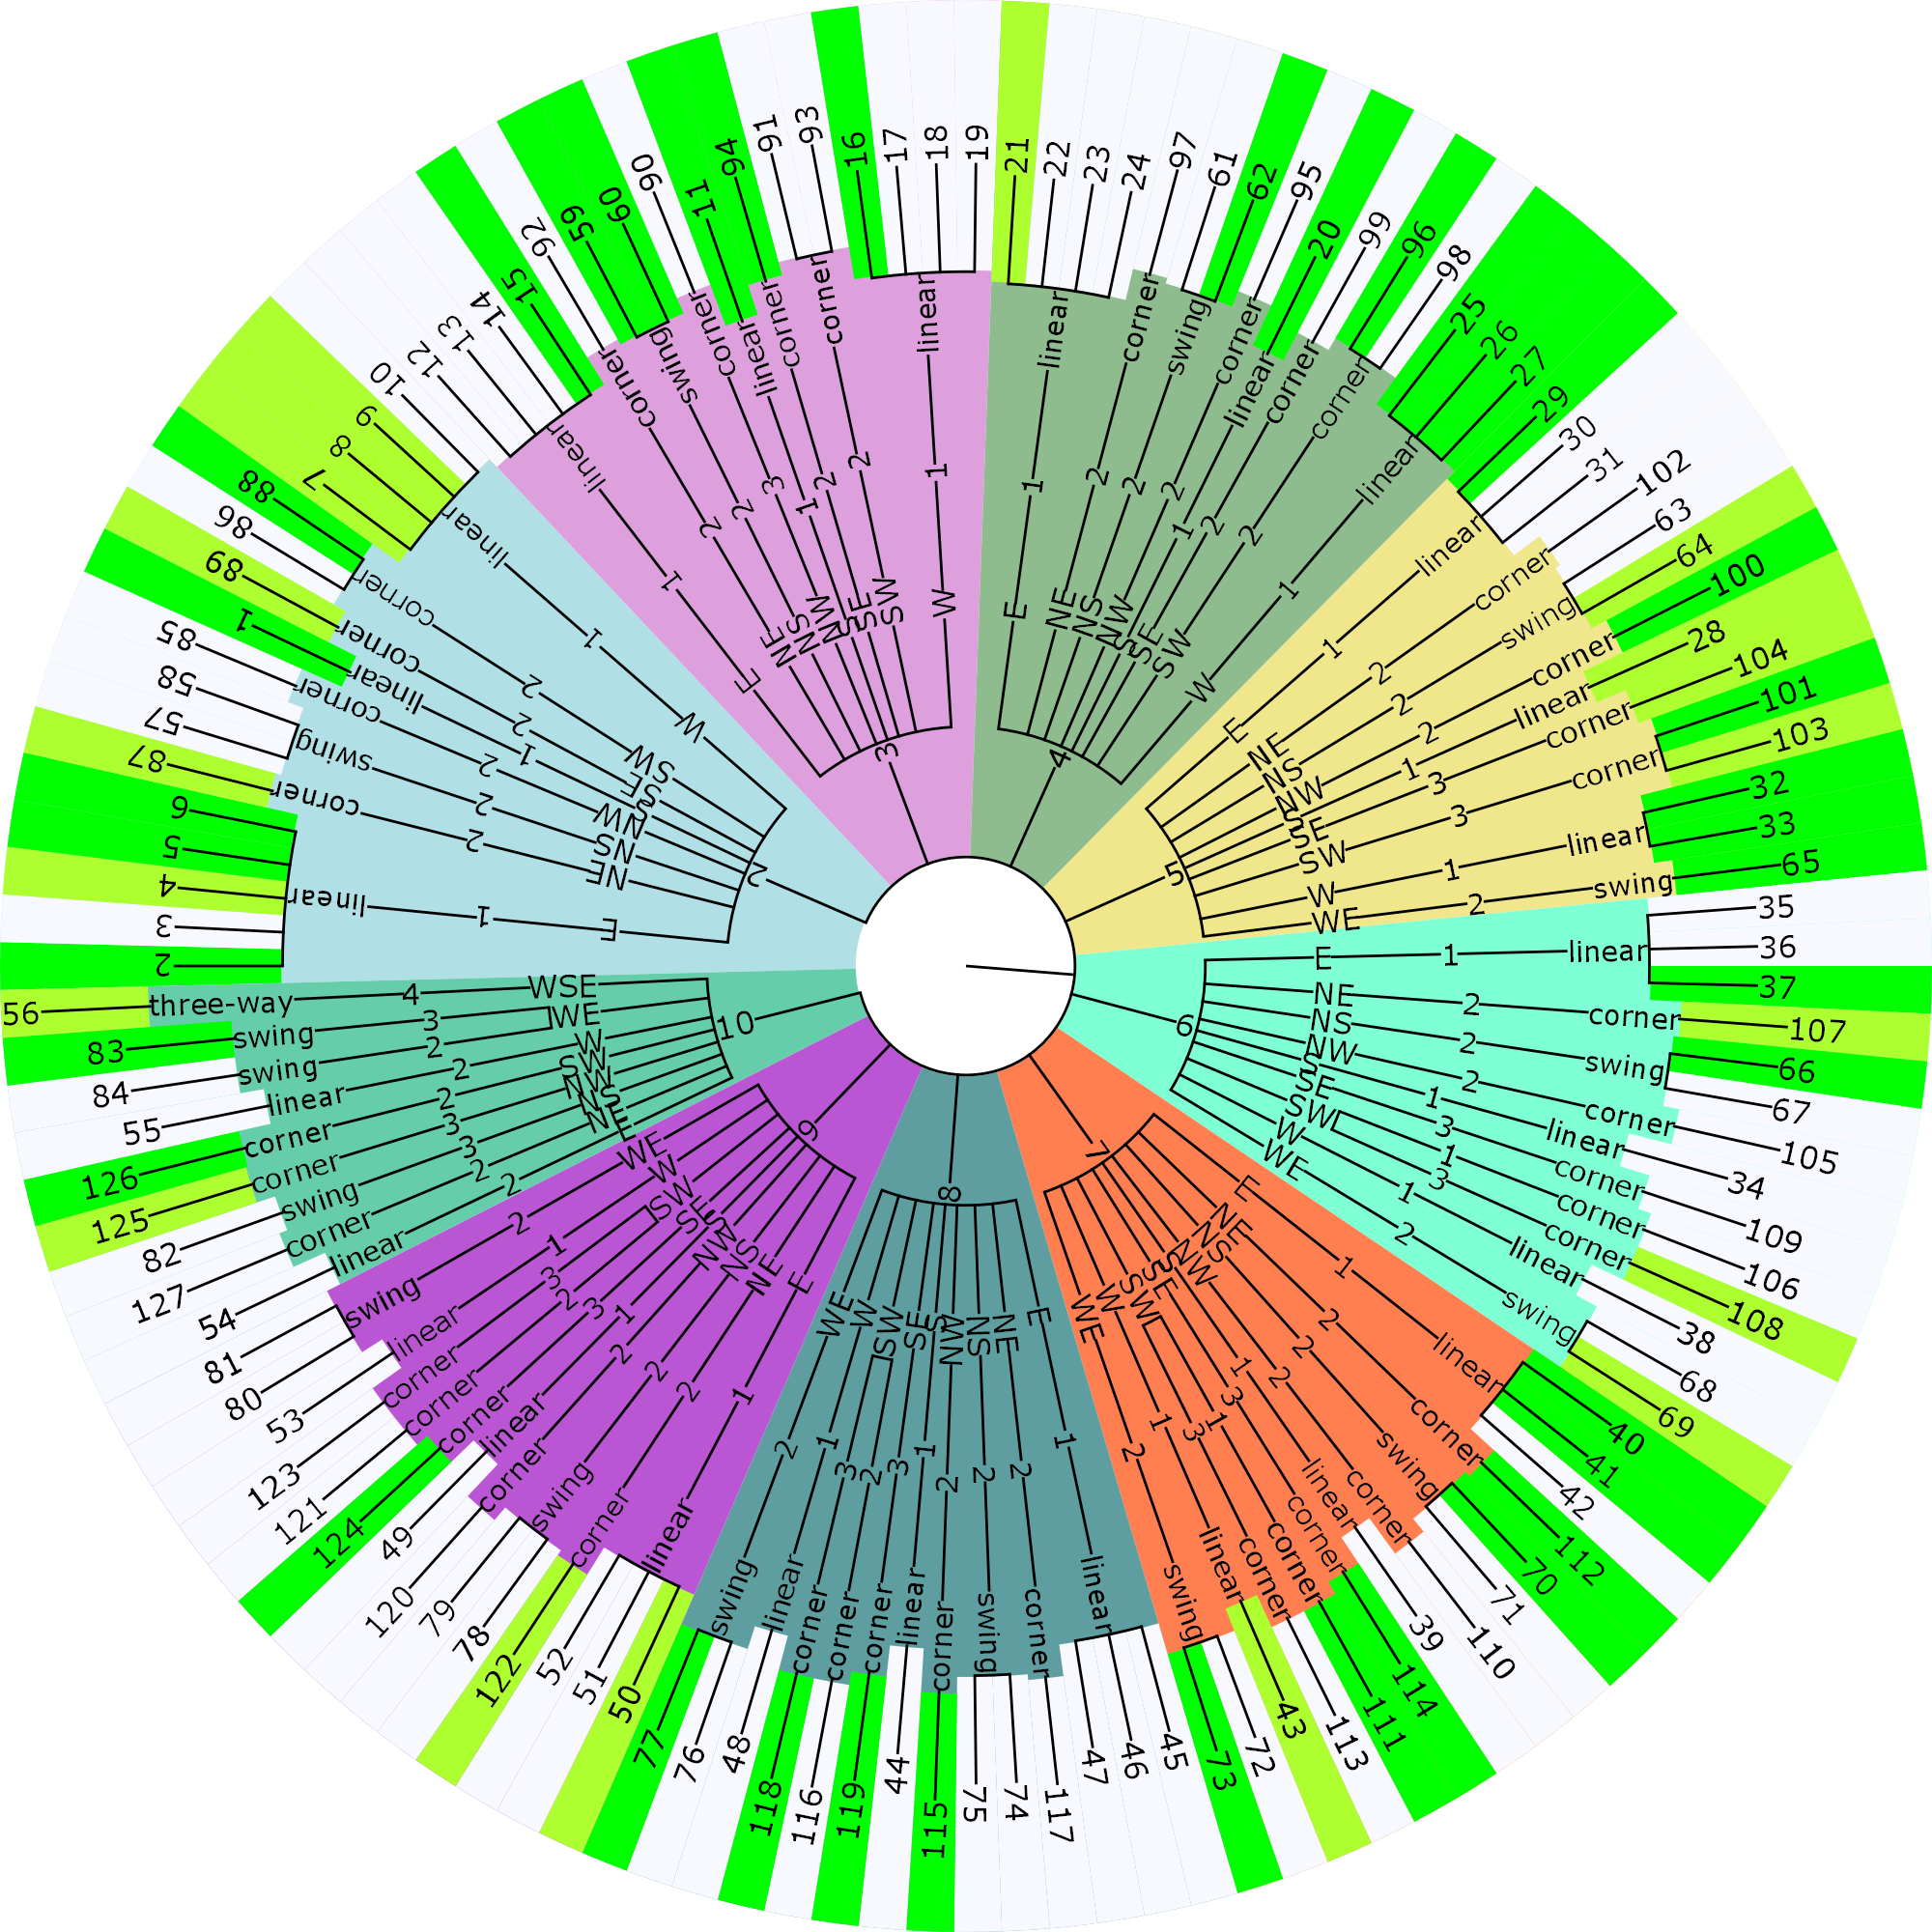

In [138]:
listOfImageNames = ['tree_2.png']#, 'tree_2.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))